<a href="https://colab.research.google.com/github/jonesLevin/Cats-and-Dogs-Classification/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify Pictures of Cats and Dogs

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-25 07:47:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-25 07:47:06 (104 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
!nvidia-smi

Fri Aug 25 07:47:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Importing Necessary Dependencies

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

## Getting the Data

In [6]:
base_dir = '/content/drive/MyDrive/Cats vs dogs classification/dogs-vs-cats'

In [4]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, walk_through_dir

In [5]:
walk_through_dir(base_dir)

There are 2 directories and 0 images in '/content/drive/MyDrive/Cats vs dogs classification/dogs-vs-cats'.
There are 2 directories and 0 images in '/content/drive/MyDrive/Cats vs dogs classification/dogs-vs-cats/test'.
There are 0 directories and 500 images in '/content/drive/MyDrive/Cats vs dogs classification/dogs-vs-cats/test/cats'.
There are 0 directories and 500 images in '/content/drive/MyDrive/Cats vs dogs classification/dogs-vs-cats/test/dogs'.
There are 2 directories and 0 images in '/content/drive/MyDrive/Cats vs dogs classification/dogs-vs-cats/train'.
There are 0 directories and 1000 images in '/content/drive/MyDrive/Cats vs dogs classification/dogs-vs-cats/train/cats'.
There are 0 directories and 1000 images in '/content/drive/MyDrive/Cats vs dogs classification/dogs-vs-cats/train/dogs'.


In [7]:
# Creating training and test directory paths
train_dir = '/content/drive/MyDrive/Cats vs dogs classification/dogs-vs-cats/train'
test_dir = '/content/drive/MyDrive/Cats vs dogs classification/dogs-vs-cats/test'

In [8]:
# Set up hyperparameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
DIR_NAME = 'tensorboard'

train_data = keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                              image_size=IMAGE_SIZE,
                                                              batch_size=BATCH_SIZE,
                                                              label_mode='binary')

test_data = keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                             image_size=IMAGE_SIZE,
                                                             batch_size=BATCH_SIZE,
                                                             label_mode='binary')

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [10]:
# Check out class names for the dataset
train_data.class_names

['cats', 'dogs']

## Model 0: Feature Extractor Model

In [37]:
# Create the model
base_model = keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model layers
base_model.trainable = False

# Create inputs into the model
inputs = keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# Pass inputs into the base model
x = base_model(inputs)
print(f'Shape after passing inputs through base model: {x.shape}')

# 6. Average pool the outputs of the base model
x = keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after passing through the global average pooling layer: {x.shape}')

# 7. Create the output activation layer
outputs = keras.layers.Dense(1, activation='sigmoid', name='output_layer')(x)

# 8. Combine the inputs and outputs into the model
model_0 = keras.Model(inputs, outputs)

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after passing through the global average pooling layer: (None, 1280)


In [38]:
# Compile model 0
model_0.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [39]:
# Fit model 0
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[create_tensorboard_callback(dir_name='tensorboard',
                                                               experiment_name='efficientnetb0_feature_extractor')])

Saving TensorBoard log files to: tensorboard/efficientnetb0_feature_extractor/20230825-082323
Epoch 1/5
63/63 [==============================] - 20s 192ms/step - loss: 0.2573 - accuracy: 0.9355 - val_loss: 0.1012 - val_accuracy: 0.9860
Epoch 2/5
63/63 [==============================] - 9s 135ms/step - loss: 0.0816 - accuracy: 0.9890 - val_loss: 0.0607 - val_accuracy: 0.9910
Epoch 3/5
63/63 [==============================] - 9s 141ms/step - loss: 0.0565 - accuracy: 0.9890 - val_loss: 0.0458 - val_accuracy: 0.9920
Epoch 4/5
63/63 [==============================] - 11s 161ms/step - loss: 0.0432 - accuracy: 0.9910 - val_loss: 0.0381 - val_accuracy: 0.9930
Epoch 5/5
63/63 [==============================] - 8s 124ms/step - loss: 0.0347 - accuracy: 0.9940 - val_loss: 0.0338 - val_accuracy: 0.9940


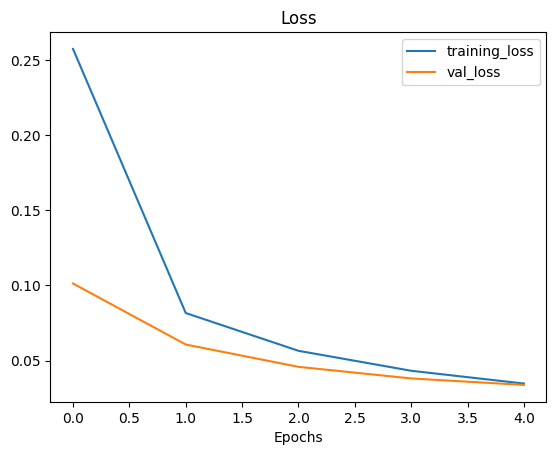

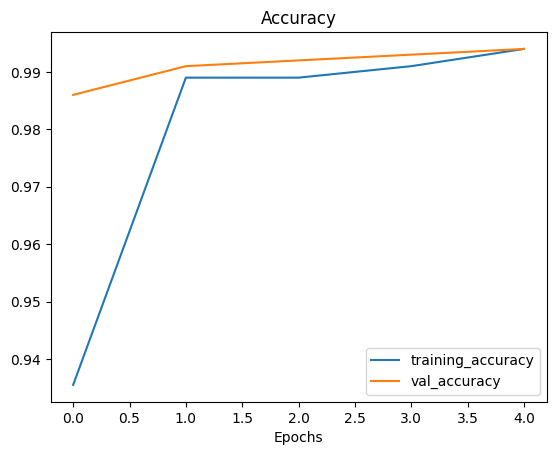

In [40]:

# Plotting the loss curves for model_0
plot_loss_curves(history_0)

## Model 1: Adding Data Augmentation

In [21]:
# Create a data augmentation layer
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

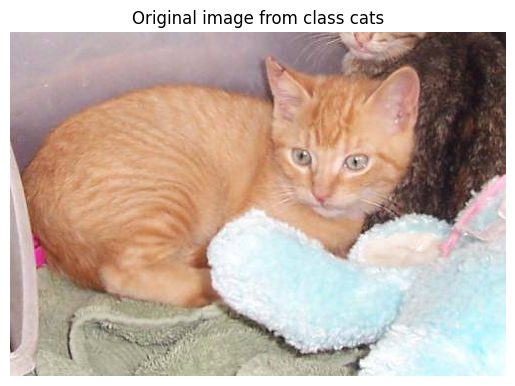

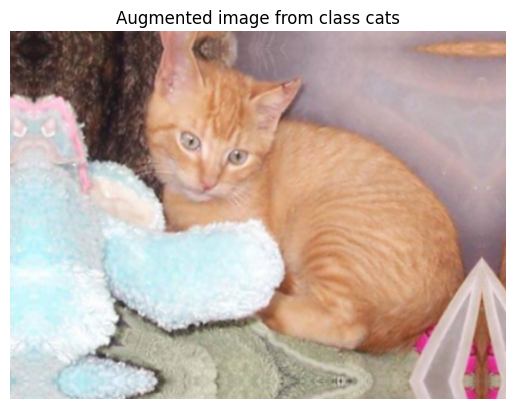

In [25]:
target_class = random.choice(train_data.class_names)
target_dir = train_dir + '/' + target_class
random_image = random.choice(os.listdir(target_dir))

random_image_path = target_dir + '/' + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Original image from class {target_class}')
plt.axis(False);

# Now read and plot the augmented version of the image
augmented_img = data_augmentation(img)
plt.figure()
plt.imshow(augmented_img/255.)
plt.title(f'Augmented image from class {target_class}')
plt.axis(False);

### Building Model 1

In [61]:
base_model = keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = keras.layers.Input(shape=(224, 224, 3), name='input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = layers.Dense(1, activation='sigmoid', name='output_layer')(x)
model_1 = keras.Model(inputs, outputs)

In [62]:
# Compile model 1
model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [63]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback('tensorboard',
                                                               'data_aug_added')])

Saving TensorBoard log files to: tensorboard/data_aug_added/20230825-083328
Epoch 1/5
63/63 [==============================] - 24s 254ms/step - loss: 0.3057 - accuracy: 0.9100 - val_loss: 0.1114 - val_accuracy: 0.9883
Epoch 2/5
63/63 [==============================] - 15s 230ms/step - loss: 0.1318 - accuracy: 0.9660 - val_loss: 0.0572 - val_accuracy: 0.9922
Epoch 3/5
63/63 [==============================] - 15s 225ms/step - loss: 0.1029 - accuracy: 0.9675 - val_loss: 0.0498 - val_accuracy: 0.9883
Epoch 4/5
63/63 [==============================] - 15s 236ms/step - loss: 0.0917 - accuracy: 0.9710 - val_loss: 0.0344 - val_accuracy: 0.9961
Epoch 5/5
63/63 [==============================] - 13s 200ms/step - loss: 0.0779 - accuracy: 0.9770 - val_loss: 0.0385 - val_accuracy: 0.9844


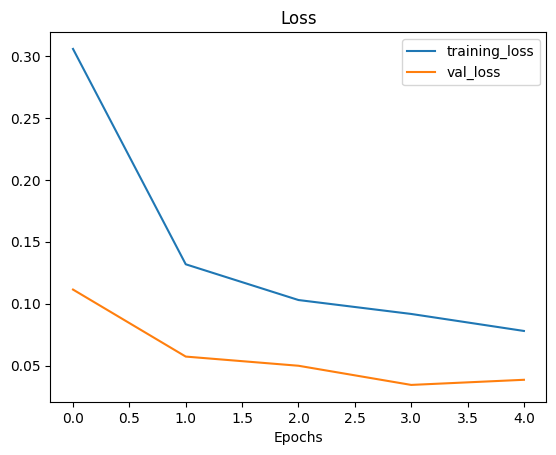

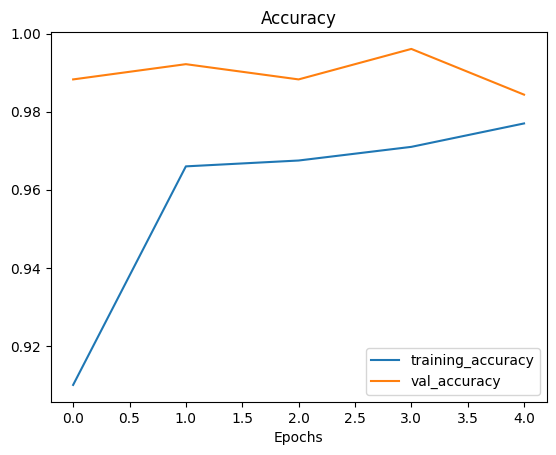

In [64]:
plot_loss_curves(history_1)

In [65]:
# Evaluating model 1 on the complete test data
model_1.evaluate(test_data)

32/32 [==============================] - 3s 73ms/step - loss: 0.0383 - accuracy: 0.9910


[0.03833482041954994, 0.9909999966621399]

## Fine Tuning Model 1

In [66]:
model_1.layers

In [67]:
# Are the layers trainabe?
for layer in model_1.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7bbba4907070> True
<keras.engine.sequential.Sequential object at 0x7bbc1caf9f60> True
<keras.engine.functional.Functional object at 0x7bbbcc1e81f0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7bbc0aefd360> True
<keras.layers.core.dense.Dense object at 0x7bbbcc1b1ea0> True


In [58]:
# Freeze the last 10 layers of the base model
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile everytime we make a change
model_1.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                metrics='accuracy')

In [59]:
len(model_1.trainable_variables)

12

In [68]:
# Fine tune for another 5 epochs
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

# Refit model_2 with more trainable layers
history_fine_tune = model_1.fit(train_data,
                                      epochs=fine_tune_epochs,
                                      validation_data=test_data,
                                      validation_steps=int(0.25 * len(test_data)),
                                      initial_epoch=history_1.epoch[-1], # Start training from previous last epoch
                                      callbacks=[create_tensorboard_callback('tensorboard',
                                                                             'fine_tune_last_10')])


Saving TensorBoard log files to: tensorboard/fine_tune_last_10/20230825-083502


Epoch 5/10
63/63 [==============================] - 14s 207ms/step - loss: 0.0712 - accuracy: 0.9750 - val_loss: 0.0323 - val_accuracy: 0.9844
Epoch 6/10
63/63 [==============================] - 16s 254ms/step - loss: 0.0621 - accuracy: 0.9780 - val_loss: 0.0348 - val_accuracy: 0.9805
Epoch 7/10
63/63 [==============================] - 13s 204ms/step - loss: 0.0591 - accuracy: 0.9820 - val_loss: 0.0280 - val_accuracy: 0.9922
Epoch 8/10
63/63 [==============================] - 13s 203ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.0200 - val_accuracy: 0.9922
Epoch 9/10
63/63 [==============================] - 13s 203ms/step - loss: 0.0619 - accuracy: 0.9800 - val_loss: 0.0218 - val_accuracy: 0.9961
Epoch 10/10
63/63 [==============================] - 15s 233ms/step - loss: 0.0498 - accuracy: 0.9855 - val_loss: 0.0222 - val_accuracy: 0.9922


In [69]:
# Evaluate fine tuned model on full test data
results_fine_tuned = model_1.evaluate(test_data)

32/32 [==============================] - 4s 96ms/step - loss: 0.0266 - accuracy: 0.9900


In [70]:
# Creating a function to compare training histories
def compare_historys(original, new, initial_epochs=5):
  # Get original history measurements
  acc = original.history['accuracy']
  loss = original.history['loss']

  val_acc = original.history['val_accuracy']
  val_loss = original.history['val_loss']

  # Combined original history
  total_acc = acc + new.history['accuracy']
  total_loss = loss + new.history['loss']

  total_val_acc = val_acc + new.history['val_accuracy']
  total_val_loss = val_loss + new.history['val_loss']

  # Make plot for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Val Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  # Make plot for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Val Loss')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')

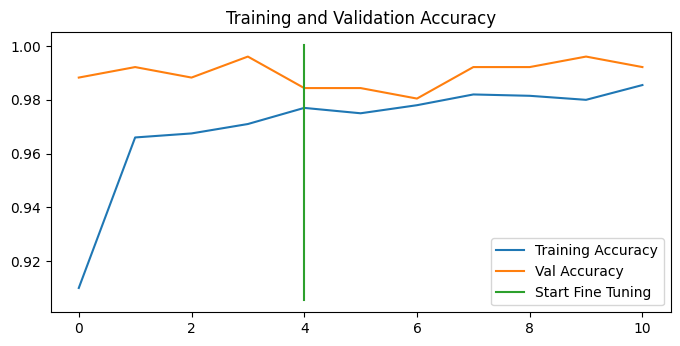

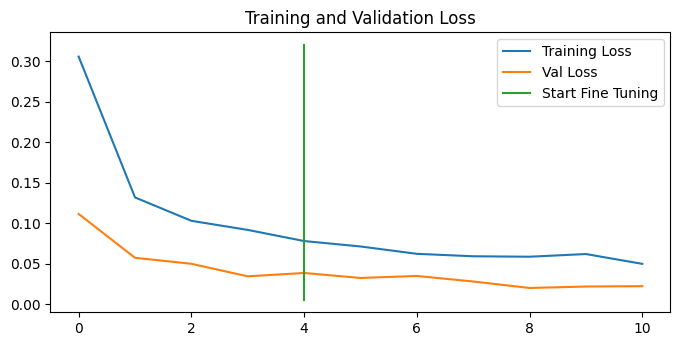

In [71]:
compare_historys(history_1, history_fine_tune)